In [31]:
import yaml
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics.cluster import homogeneity_score
from sklearn.metrics.cluster import completeness_score
from sklearn.metrics.cluster import mutual_info_score
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics.cluster import adjusted_mutual_info_score
from sklearn.metrics.cluster import fowlkes_mallows_score
cmetric = normalized_mutual_info_score
from sklearn.metrics import confusion_matrix

In [32]:
pred_communities = np.load("../results/Epen1/p95/pred_communities.npy").astype(int)
with open("../data/cell-type-specific/Epen1-networks/adj/p95/msdyn_nw_details.yaml", "r") as outfile:
    msdyn_nw_details = yaml.load(outfile, Loader=yaml.SafeLoader)

In [33]:
donor_idx_keys = sorted(msdyn_nw_details["donor_indices"].keys())

In [34]:
pred_communities.shape

(8, 2, 2475)

In [35]:
uniq, uniq_counts = np.unique(pred_communities[0,0,:], return_counts=True)

for i in range(pred_communities.shape[0]):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(32,8))
    axes[0].set_title("time step 1")
    axes[1].set_title("time step 2")
    axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation = 90)
    axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation = 90)
    sns.countplot(pred_communities[i,0,:], palette="tab20", ax=axes[0])
    sns.countplot(pred_communities[i,1,:], palette="tab20", ax=axes[1])
    donor_name = msdyn_nw_details["donor_indices"][donor_idx_keys[i]]
    plt.suptitle(f"Subject-{donor_name}")

In [36]:
sum_t = 0
for i in range(pred_communities.shape[0]):
    ari = cmetric(pred_communities[i,0,:],pred_communities[i,1,:])
    donor_name = msdyn_nw_details["donor_indices"][donor_idx_keys[i]]
    print(f"ARI of time step 1 and time step 2 for {donor_name} is {round(ari,3)}")
    sum_t += ari

ARI of time step 1 and time step 2 for HPSI0114i-eipl_1 is 0.256
ARI of time step 1 and time step 2 for HPSI0115i-aoxv_1 is 0.215
ARI of time step 1 and time step 2 for HPSI0115i-timk_4 is 0.298
ARI of time step 1 and time step 2 for HPSI0414i-mita_1 is 0.312
ARI of time step 1 and time step 2 for HPSI0514i-fiaj_1 is 0.308
ARI of time step 1 and time step 2 for HPSI0714i-keui_4 is 0.211
ARI of time step 1 and time step 2 for HPSI0715i-aowh_2 is 0.207
ARI of time step 1 and time step 2 for HPSI1013i-hiaf_1 is 0.222


In [37]:
sum_t/pred_communities.shape[0]

0.2534868323218924

In [38]:
sum1 = 0
sum2 = 0
measure_sbj_dict = {}
for i in range(pred_communities.shape[0]):
    donor_name_i = msdyn_nw_details["donor_indices"][donor_idx_keys[i]]
    measure_sbj_dict[donor_name_i] = {}
    
    for j in range(pred_communities.shape[0]):
        ari1 = cmetric(pred_communities[i,0,:],pred_communities[j,0,:], average_method="max")
        donor_name_j = msdyn_nw_details["donor_indices"][donor_idx_keys[j]]
        #print(f"ARI of {donor_name_i} and {donor_name_j} is {round(ari1,3)} at time step 1")
        ari2 = cmetric(pred_communities[i,1,:],pred_communities[j,1,:], average_method="max")
        #print(f"ARI of {donor_name_i} and {donor_name_j} is {round(ari2,3)} at time step 2")
        if i!=j:
            sum1 += ari1
            sum2 += ari2
            measure_sbj_dict[donor_name_i][donor_name_j] = {1: ari1, 2:ari2}

In [39]:
low_diff = ["HPSI0714i-keui_4", "HPSI0514i-fiaj_1", "HPSI0115i-timk_4", "HPSI0114i-eipl_1"]
high_diff = ["HPSI0715i-aowh_2", "HPSI1013i-hiaf_1", "HPSI0115i-aoxv_1"]

In [40]:
print("FOR LOW, both time step:\n")
sum_all_high = 0
sum_all_low = 0

low_low_dict = {}
low_high_dict = {}
for low_key_i in low_diff:
    sum_low = 0
    for low_key_j in low_diff:
        if low_key_j != low_key_i:
            sum_low += (measure_sbj_dict[low_key_i][low_key_j][1] + measure_sbj_dict[low_key_i][low_key_j][2]) / (len(2*low_diff)  -2)
    print("low:", low_key_i, sum_low)
    low_low_dict[low_key_i] = sum_low
    sum_all_low += sum_low
    sum_high = 0
    for high_key_j in high_diff:
        sum_high += (measure_sbj_dict[low_key_i][high_key_j][1] + measure_sbj_dict[low_key_i][high_key_j][2]) / len(2*high_diff)
    print("high:", low_key_i, sum_high)
    low_high_dict[low_key_i] = sum_high
    sum_all_high += sum_high
    print("\n")
print("AVG LOW:", sum_all_low/len(low_diff))
print("AVG HIGH:", sum_all_high/len(low_diff))

FOR LOW, both time step:

low: HPSI0714i-keui_4 0.27805316309445327
high: HPSI0714i-keui_4 0.22834717136380506


low: HPSI0514i-fiaj_1 0.32511729106728177
high: HPSI0514i-fiaj_1 0.24928223289093593


low: HPSI0115i-timk_4 0.3208488827662866
high: HPSI0115i-timk_4 0.2637999473154303


low: HPSI0114i-eipl_1 0.2828613150264171
high: HPSI0114i-eipl_1 0.2139298390359597


AVG LOW: 0.3017201629886097
AVG HIGH: 0.23883979765153274


In [41]:
print("FOR LOW, time step 1:\n")
sum_all_high = 0
sum_all_low = 0
for low_key_i in low_diff:
    sum_low = 0
    for low_key_j in low_diff:
        if low_key_j != low_key_i:
            sum_low += (measure_sbj_dict[low_key_i][low_key_j][1]) / (len(low_diff)-1)
    print("low:", low_key_i, sum_low)
    sum_all_low += sum_low
    sum_high = 0
    for high_key_j in high_diff:
        sum_high += (measure_sbj_dict[low_key_i][high_key_j][1]) / len(high_diff)
    print("high:", low_key_i, sum_high)
    sum_all_high += sum_high
    print("\n")
print("AVG LOW:", sum_all_low/len(low_diff))
print("AVG HIGH:", sum_all_high/len(low_diff))

FOR LOW, time step 1:

low: HPSI0714i-keui_4 0.2537608439423268
high: HPSI0714i-keui_4 0.2104986861933979


low: HPSI0514i-fiaj_1 0.27822927959266713
high: HPSI0514i-fiaj_1 0.24050300177479353


low: HPSI0115i-timk_4 0.30340943945981685
high: HPSI0115i-timk_4 0.2787541626058037


low: HPSI0114i-eipl_1 0.2589458377670621
high: HPSI0114i-eipl_1 0.2165202589995986


AVG LOW: 0.27358635019046823
AVG HIGH: 0.23656902739339844


In [42]:
print("FOR LOW, time step 2:\n")
sum_all_high = 0
sum_all_low = 0
for low_key_i in low_diff:
    sum_low = 0
    for low_key_j in low_diff:
        if low_key_j != low_key_i:
            sum_low += (measure_sbj_dict[low_key_i][low_key_j][2]) / (len(low_diff)  -1)
    print("low:", low_key_i, sum_low)
    sum_all_low += sum_low
    sum_high = 0
    for high_key_j in high_diff:
        sum_high += (measure_sbj_dict[low_key_i][high_key_j][2]) / len(high_diff)
    print("high:", low_key_i, sum_high)
    sum_all_high += sum_high
    print("\n")
print("AVG LOW:", sum_all_low/len(low_diff))
print("AVG HIGH:", sum_all_high/len(low_diff))

FOR LOW, time step 2:

low: HPSI0714i-keui_4 0.3023454822465797
high: HPSI0714i-keui_4 0.24619565653421221


low: HPSI0514i-fiaj_1 0.37200530254189645
high: HPSI0514i-fiaj_1 0.2580614640070784


low: HPSI0115i-timk_4 0.33828832607275633
high: HPSI0115i-timk_4 0.248845732025057


low: HPSI0114i-eipl_1 0.30677679228577204
high: HPSI0114i-eipl_1 0.21133941907232073


AVG LOW: 0.32985397578675113
AVG HIGH: 0.24111056790966712


In [43]:
print("FOR HIGH, both time step:\n")
sum_all_high = 0
sum_all_low = 0
high_high_dict = {}
high_low_dict = {}
for high_key_i in high_diff:
    sum_low = 0
    for low_key_j in low_diff:
        sum_low += (measure_sbj_dict[high_key_i][low_key_j][1] + measure_sbj_dict[high_key_i][low_key_j][2]) / len(2*low_diff)  
    print("low:", low_key_i, sum_low)
    sum_all_low += sum_low
    sum_high = 0
    for high_key_j in high_diff:
        if high_key_i != high_key_j:
            sum_high += (measure_sbj_dict[high_key_i][high_key_j][1] + measure_sbj_dict[high_key_i][high_key_j][2]) / (len(2*high_diff) -2 )
    print("high:", low_key_i, sum_high)
    high_high_dict[high_key_i] = sum_high

    high_low_dict[high_key_i] = sum_low
    sum_all_high += sum_high
    print("\n")    
print("AVG LOW:", sum_all_low/len(high_diff))
print("AVG HIGH:", sum_all_high/len(high_diff))

FOR HIGH, both time step:

low: HPSI0114i-eipl_1 0.234411277246421
high: HPSI0114i-eipl_1 0.2575297913001129


low: HPSI0114i-eipl_1 0.2339244794930525
high: HPSI0114i-eipl_1 0.2547596830465022


low: HPSI0114i-eipl_1 0.24818363621512476
high: HPSI0114i-eipl_1 0.2690361835640309


AVG LOW: 0.23883979765153274
AVG HIGH: 0.26044188597021534


In [44]:
print("FOR HIGH, time step 1:\n")
sum_all_high = 0
sum_all_low = 0
for high_key_i in high_diff:
    sum_low = 0
    for low_key_j in low_diff:
        sum_low += (measure_sbj_dict[high_key_i][low_key_j][1]) / len(low_diff)  
    print("low:", low_key_i, sum_low)
    sum_all_low += sum_low
    sum_high = 0
    for high_key_j in high_diff:
        if high_key_i != high_key_j:
            sum_high += (measure_sbj_dict[high_key_i][high_key_j][1]) / (len(high_diff)-1)
    print("high:", low_key_i, sum_high)
    sum_all_high += sum_high
    print("\n")
print("AVG LOW:", sum_all_low/len(high_diff))
print("AVG HIGH:", sum_all_high/len(high_diff))

FOR HIGH, time step 1:

low: HPSI0114i-eipl_1 0.20698075644383795
high: HPSI0114i-eipl_1 0.2338032716853669


low: HPSI0114i-eipl_1 0.24913382882741825
high: HPSI0114i-eipl_1 0.2566490700745282


low: HPSI0114i-eipl_1 0.25359249690893915
high: HPSI0114i-eipl_1 0.25509037136742546


AVG LOW: 0.23656902739339847
AVG HIGH: 0.24851423770910686


In [45]:
print("FOR HIGH, time step 2:\n")
sum_all_high = 0
sum_all_low = 0
for high_key_i in high_diff:
    sum_low = 0
    for low_key_j in low_diff:
        sum_low += (measure_sbj_dict[high_key_i][low_key_j][2]) / len(low_diff)  
    print("low:", high_key_i, sum_low)
    sum_all_low += sum_low
    sum_high = 0
    for high_key_j in high_diff:
        if high_key_i != high_key_j:
            sum_high += (measure_sbj_dict[high_key_i][high_key_j][2]) / (len(high_diff)-1)
    print("high:", high_key_i, sum_high)
    sum_all_high += sum_high
    print("\n")
print("AVG LOW:", sum_all_low/len(high_diff))
print("AVG HIGH:", sum_all_high/len(high_diff))

FOR HIGH, time step 2:

low: HPSI0715i-aowh_2 0.26184179804900404
high: HPSI0715i-aowh_2 0.28125631091485886


low: HPSI1013i-hiaf_1 0.21871513015868682
high: HPSI1013i-hiaf_1 0.25287029601847627


low: HPSI0115i-aoxv_1 0.24277477552131038
high: HPSI0115i-aoxv_1 0.2829819957606363


AVG LOW: 0.2411105679096671
AVG HIGH: 0.2723695342313238


In [46]:
measure_sbj_dict["HPSI0114i-eipl_1"]

{'HPSI0115i-aoxv_1': {1: 0.22123326443008587, 2: 0.20176974237284567},
 'HPSI0115i-timk_4': {1: 0.28629674972770586, 2: 0.30347158236194716},
 'HPSI0414i-mita_1': {1: 0.25636238110041865, 2: 0.2623610724774641},
 'HPSI0514i-fiaj_1': {1: 0.24748119138648594, 2: 0.3588902544346988},
 'HPSI0714i-keui_4': {1: 0.2430595721869945, 2: 0.2579685400606702},
 'HPSI0715i-aowh_2': {1: 0.19396298334585763, 2: 0.22966658976026436},
 'HPSI1013i-hiaf_1': {1: 0.23436452922285222, 2: 0.20258192508385223}}

In [47]:
sum_measure_dict = {}
all_sum1 = 0
all_sum2 = 0
for key, values in measure_sbj_dict.items():
    sum1 = 0
    sum2 = 0
    for val in values.values():
        sum1 += val[1]
        sum2 += val[2]
    all_sum1 += sum1
    all_sum2 += sum2
    sum_measure_dict[key] = {1: sum1, 2:sum2}    
sum_measure_dict

{'HPSI0114i-eipl_1': {1: 1.6827606714004006, 2: 1.8167097065517426},
 'HPSI0115i-aoxv_1': {1: 1.8488341436597784, 2: 1.842883374829132},
 'HPSI0115i-timk_4': {1: 2.121083005285643, 2: 2.064091812445008},
 'HPSI0414i-mita_1': {1: 2.1573092416063546, 2: 2.0465833619787803},
 'HPSI0514i-fiaj_1': {1: 1.869006189761886, 2: 2.1982885302642776},
 'HPSI0714i-keui_4': {1: 1.6589923322453637, 2: 1.9186442936178079},
 'HPSI0715i-aowh_2': {1: 1.5600513887216791, 2: 1.9412387003669314},
 'HPSI1013i-hiaf_1': {1: 1.868359796513426, 2: 1.6438454885648477}}

In [48]:
(all_sum1+all_sum2)/(2*(pred_communities.shape[0]*(pred_communities.shape[0]-1)))

0.2699882324804737

In [49]:
high_high_dict
high_low_dict
low_low_dict
low_high_dict

{'HPSI0714i-keui_4': 0.22834717136380506,
 'HPSI0514i-fiaj_1': 0.24928223289093593,
 'HPSI0115i-timk_4': 0.2637999473154303,
 'HPSI0114i-eipl_1': 0.2139298390359597}

In [50]:
low_low_dict

{'HPSI0714i-keui_4': 0.27805316309445327,
 'HPSI0514i-fiaj_1': 0.32511729106728177,
 'HPSI0115i-timk_4': 0.3208488827662866,
 'HPSI0114i-eipl_1': 0.2828613150264171}

In [51]:
high_low_dict

{'HPSI0715i-aowh_2': 0.234411277246421,
 'HPSI1013i-hiaf_1': 0.2339244794930525,
 'HPSI0115i-aoxv_1': 0.24818363621512476}

In [52]:
high_high_dict

{'HPSI0715i-aowh_2': 0.2575297913001129,
 'HPSI1013i-hiaf_1': 0.2547596830465022,
 'HPSI0115i-aoxv_1': 0.2690361835640309}

In [53]:
import numpy as np
import pandas as pd

In [54]:
all_values = {"name":[], "type":[], "val":[]}
for name, val in high_low_dict.items():
    all_values["name"].append( name)
    all_values["type"].append("high_to_low")
    all_values["val"].append(val) 
for name, val in low_high_dict.items():
    all_values["name"].append(name)
    all_values["type"].append("high_to_low")
    all_values["val"].append(val)
for name, val in low_low_dict.items():
    all_values["name"].append(name)
    all_values["type"].append("low_to_low")
    all_values["val"].append(val)
for name, val in high_high_dict.items():
    all_values["name"].append(name)
    all_values["type"].append("high_to_high")
    all_values["val"].append(val)


In [55]:
all_values

{'name': ['HPSI0715i-aowh_2',
  'HPSI1013i-hiaf_1',
  'HPSI0115i-aoxv_1',
  'HPSI0714i-keui_4',
  'HPSI0514i-fiaj_1',
  'HPSI0115i-timk_4',
  'HPSI0114i-eipl_1',
  'HPSI0714i-keui_4',
  'HPSI0514i-fiaj_1',
  'HPSI0115i-timk_4',
  'HPSI0114i-eipl_1',
  'HPSI0715i-aowh_2',
  'HPSI1013i-hiaf_1',
  'HPSI0115i-aoxv_1'],
 'type': ['high_to_low',
  'high_to_low',
  'high_to_low',
  'high_to_low',
  'high_to_low',
  'high_to_low',
  'high_to_low',
  'low_to_low',
  'low_to_low',
  'low_to_low',
  'low_to_low',
  'high_to_high',
  'high_to_high',
  'high_to_high'],
 'val': [0.234411277246421,
  0.2339244794930525,
  0.24818363621512476,
  0.22834717136380506,
  0.24928223289093593,
  0.2637999473154303,
  0.2139298390359597,
  0.27805316309445327,
  0.32511729106728177,
  0.3208488827662866,
  0.2828613150264171,
  0.2575297913001129,
  0.2547596830465022,
  0.2690361835640309]}

In [56]:
all_val = pd.DataFrame.from_dict(all_values)

In [57]:
me_val = all_val.groupby(by=["type"])["val"].median().iloc[::-1]
order = pd.Index(['low_to_low', 'high_to_high', 'high_to_low'], dtype='object', name='type')

In [58]:
me_val

type
low_to_low      0.301855
high_to_low     0.234411
high_to_high    0.257530
Name: val, dtype: float64

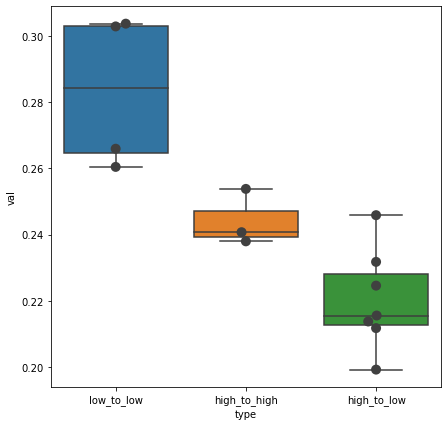

In [29]:
fig, ax = plt.subplots(figsize=(7,7))
ax = sns.boxplot(x="type", y="val", data=all_val, ax=ax, order=order)
ax = sns.swarmplot(x="type", y="val", data=all_val, color=".25", ax=ax, size=10, order=order)

In [30]:
import tikzplotlib
tikzplotlib.clean_figure()
print(tikzplotlib.get_tikz_code(figure=fig))

% This file was created by tikzplotlib v0.9.8.
\begin{tikzpicture}

\definecolor{color0}{rgb}{0.194607843137255,0.453431372549019,0.632843137254902}
\definecolor{color1}{rgb}{0.881862745098039,0.505392156862745,0.173039215686275}
\definecolor{color2}{rgb}{0.229411764705882,0.570588235294118,0.229411764705882}

\begin{axis}[
tick align=outside,
tick pos=left,
x grid style={white!69.0196078431373!black},
xlabel={type},
xmin=-0.5, xmax=2.5,
xtick style={color=black},
xtick={0,1,2},
xticklabels={low\_to\_low,high\_to\_high,high\_to\_low},
y grid style={white!69.0196078431373!black},
ylabel={val},
ymin=0.193944456562779, ymax=0.309031500320449,
ytick style={color=black},
ytick={0.18,0.2,0.22,0.24,0.26,0.28,0.3,0.32},
yticklabels={0.18,0.20,0.22,0.24,0.26,0.28,0.30,0.32}
]
\path [draw=white!23.921568627451!black, fill=color0, semithick]
(axis cs:-0.4,0.264601175281436)
--(axis cs:0.4,0.264601175281436)
--(axis cs:0.4,0.303175513990669)
--(axis cs:-0.4,0.303175513990669)
--(axis cs:-0.4,0.264

<Figure size 432x288 with 0 Axes>